In [1]:
from analysis import load_data, parse_data

In [2]:
df = load_data("data/data.zip")
df2 = parse_data(df, True)

orig_size: 955.4 MB
new_size: 183.8 MB


In [4]:
del df

In [30]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import zipfile
import io
from analysis import p7_enum_to_str

In [16]:
df = df2.copy()
region_names = {
    "PHA": "hl. m. Praha",
    "STC": "Středočeský kraj",
    "JHC": "Jihočeský kraj",
    "PLK": "Plzeňský kraj"
}

df["p7"] = pd.Series(
    [
        p7_enum_to_str(p7)
        for p7 in df["p7"]
    ],
    dtype="category",
    index=df.index
)

df["month"] = [
    date.month for date in df["date"]
]

print(df["month"])
regions_data = df[df["region"].isin(region_names.keys())].groupby(["region"])


#fig, axes = plt.subplots(2, 2, figsize=(12, 6))
#fig.subplots_adjust(hspace=.5)  # bigger space between plot rows
#axx = [*axes[0], *axes[1]]  # 2d array to 1d

p1
2100160001       1
2100160002       1
2100160003       1
2100160004       1
2100160005       1
                ..
190906210729    12
190906210730    12
190906210731    12
190906210732    12
190906210733    12
Name: month, Length: 609146, dtype: int64


In [17]:
region_data = regions_data.get_group("PHA")

In [18]:
region_data

,p36,p37,date,weekday(p2a),p2b,p6,p7,p8,p9,p10,...,n,o,p,q,r,s,t,p5a,region,month
p1,,,,,,,,,,,,,,,,,,,,,
2100160001,4,NaN,2016-01-01,5,55.0,1,Čelná,0,2,1,...,711403.0,NaN,Souhlasnýsesměremúseku,Pomalý,554782.0,451622.0,GN_V0.1UIR-ADR_410,1,PHA,1
2100160002,4,NaN,2016-01-01,5,130.0,1,Bočná,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA,1
2100160003,5,NaN,2016-01-01,5,100.0,1,Bočná,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA,1
2100160004,6,NaN,2016-01-01,5,120.0,9,NaN,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA,1
2100160005,6,NaN,2016-01-01,5,2560.0,2,NaN,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10043213151,0,11.0,2021-11-05,5,2250.0,5,NaN,0,2,4,...,3717337.0,NaN,Souhlasnýsesměremúseku,Pomalý,554782.0,507890.0,GN_V0.1UIR-ADR_410,1,PHA,11
10043213152,0,11.0,2021-11-08,1,1145.0,2,NaN,0,2,1,...,3700576.0,NaN,Souhlasnýsesměremúseku,Pomalý,554782.0,NaN,GN_V0.1UIR-ADR_410,1,PHA,11
10043213153,6,NaN,2021-11-08,1,2560.0,2,NaN,0,2,1,...,3700578.0,NaN,Souhlasnýsesměremúseku,Pomalý,554782.0,NaN,GN_V0.1UIR-ADR_410,1,PHA,11


In [25]:
grouped = region_data.groupby(["month", "p7"])

In [32]:
grouped.size()

month  p7    
1      Bočná     2637
       Zozadu    2137
       Čelná      194
2      Bočná     2501
       Zozadu    2175
       Čelná      181
3      Bočná     2871
       Zozadu    2212
       Čelná      181
4      Bočná     3084
       Zozadu    2405
       Čelná      166
5      Bočná     3287
       Zozadu    2436
       Čelná      242
6      Bočná     3126
       Zozadu    2420
       Čelná      207
7      Bočná     2640
       Zozadu    2007
       Čelná      217
8      Bočná     2783
       Zozadu    2206
       Čelná      198
9      Bočná     3233
       Zozadu    2425
       Čelná      213
10     Bočná     3530
       Zozadu    2621
       Čelná      233
11     Bočná     3262
       Zozadu    2400
       Čelná      215
12     Bočná     2781
       Zozadu    2212
       Čelná      210
dtype: int64

In [38]:
grouped.size().unstack()

p7,Bočná,Zozadu,Čelná
month,,,
1,2637,2137,194
2,2501,2175,181
3,2871,2212,181
4,3084,2405,166
5,3287,2436,242
6,3126,2420,207
7,2640,2007,217
8,2783,2206,198
9,3233,2425,213


<AxesSubplot: xlabel='month'>

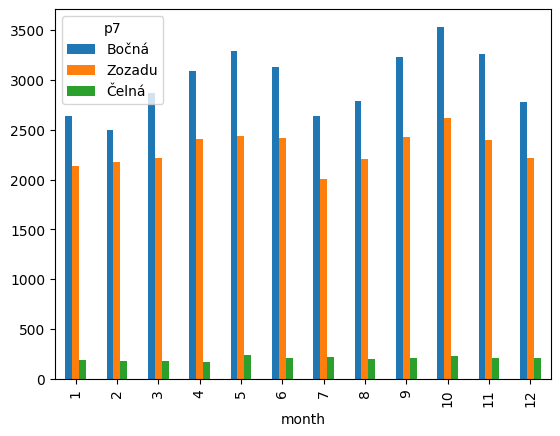

In [37]:
grouped.size().unstack().plot.bar()

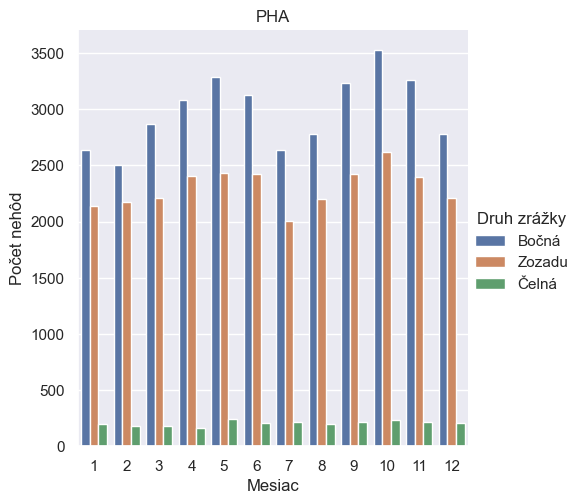

In [64]:
sns.set_theme()
g = sns.catplot(data=region_data, kind="count", x="month", hue="p7")
g.set(title="PHA")
g.set_ylabels("Počet nehôd")
g.set_xlabels("Mesiac")
g.legend.set_title("Druh zrážky")
g

#Task 5

In [3]:
region_names = {
        "PHA": "hl. m. Praha",
        "STC": "Středočeský kraj",
        "JHC": "Jihočeský kraj",
        "PLK": "Plzeňský kraj"
    }
df2 = df.copy()
regions_data = df2[df2["region"].isin(region_names.keys())]

In [15]:
regions_data

,p36,p37,date,weekday(p2a),p2b,p6,p7,p8,p9,p10,...,l,n,o,p,q,r,s,t,p5a,region
p1,,,,,,,,,,,,,,,,,,,,,
2100160001,4,NaN,2016-01-01,5,55.0,1,1,0,2,1,...,NaN,711403.0,NaN,Souhlasnýsesměremúseku,Pomalý,554782.0,451622.0,GN_V0.1UIR-ADR_410,1,PHA
2100160002,4,NaN,2016-01-01,5,130.0,1,3,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
2100160003,5,NaN,2016-01-01,5,100.0,1,2,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
2100160004,6,NaN,2016-01-01,5,120.0,9,0,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
2100160005,6,NaN,2016-01-01,5,2560.0,2,0,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31106210708,1,20.0,2021-12-30,4,1440.0,3,0,6,1,1,...,20.0,2833546.0,NaN,Souhlasnýsesměremúseku,Pomalý,557897.0,NaN,GN_V0.1UIR-ADR_410,2,JHC
31106210709,2,177.0,2021-12-30,4,1427.0,3,0,9,2,1,...,177.0,2833539.0,NaN,Souhlasnýsesměremúseku,Pomalý,558061.0,NaN,GN_V0.1UIR-ADR_410,1,JHC
31106210710,1,27.0,2021-12-30,4,1925.0,1,3,0,2,1,...,27.0,1376370.0,NaN,Opačnýkesměruúseku,Pomalý,558249.0,388751.0,GN_V0.1UIR-ADR_410,1,JHC


In [16]:
regions_data

p1
2100160001    2016-01-01
2100160002    2016-01-01
2100160003    2016-01-01
2100160004    2016-01-01
2100160005    2016-01-01
                 ...    
31106210708   2021-12-30
31106210709   2021-12-30
31106210710   2021-12-30
31106210711   2021-12-31
31106210712   2021-12-31
Name: date, Length: 261222, dtype: datetime64[ns]

In [266]:
regions_data[(regions_data["p13a"] > -1) | (regions_data["p13b"] > -1) | (regions_data["p13c"] > -1)]

,p36,p37,date,weekday(p2a),p2b,p6,p7,p8,p9,p10,p11,p12,p13a,p13b,p13c,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p27,p28,p34,p35,p39,p44,p45a,p47,p48a,p49,p50a,p50b,p51,p52,p53,p55a,p57,p58,a,b,d,e,f,g,h,i,j,k,l,n,o,p,q,r,s,t,p5a,region,conseq
p1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2100160001,4,NaN,2016-01-01,5,55.0,1,1,0,2,1,2,405,0,0,0,4800.0,2,6,1,3,4,1,0,1,2,0,2,4,2,19,NaN,3,2.0,15.0,3.0,0.0,1.0,0.0,1.0,53.0,4000.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,PRAHA9,Kbelská,NaN,místníkomunikace,NaN,711403.0,NaN,Souhlasnýsesměremúseku,Pomalý,554782.0,451622.0,GN_V0.1UIR-ADR_410,1,PHA,Lahke zranenia
2100160002,4,NaN,2016-01-01,5,130.0,1,3,0,2,1,2,401,0,0,0,600.0,2,3,1,1,4,1,0,1,2,0,0,4,2,19,NaN,3,47.0,8.0,1.0,0.0,1.0,0.0,1.0,75.0,300.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,PRAHA2,LEGEROVA,NaN,uzel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA,Lahke zranenia
2100160003,5,NaN,2016-01-01,5,100.0,1,2,0,2,1,2,506,0,0,0,350.0,1,3,1,1,4,1,2,1,0,0,0,3,2,0,NaN,3,7.0,6.0,3.0,0.0,1.0,0.0,1.0,1.0,50.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,PRAHA1,Sedmnáctéholistopadu,NaN,sledovanákomunikace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA,Lahke zranenia
2100160004,6,NaN,2016-01-01,5,120.0,9,0,0,2,1,9,511,0,0,0,200.0,2,5,1,5,5,1,1,3,0,0,0,1,1,0,NaN,3,7.0,5.0,1.0,1.0,1.0,0.0,1.0,5.0,200.0,2.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,PRAHA10,KDÁLNICI,NaN,sledovanákomunikace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA,Lahke zranenia
2100160005,6,NaN,2016-01-01,5,2560.0,2,0,0,2,1,0,516,0,0,0,200.0,2,3,1,1,1,1,1,1,0,0,0,1,2,0,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRAHA8,KOLLÁROVA,NaN,místníkomunikace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,PHA,Lahke zranenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31106210708,1,20.0,2021-12-30,4,1440.0,3,0,6,1,1,2,204,0,1,0,350.0,2,3,1,3,1,1,1,8,3,4,0,5,1,19,3.0,3,31.0,2.0,1.0,0.0,1.0,0.0,1.0,31.0,300.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,silnice1.třídy,20.0,2833546.0,NaN,Souhlasnýsesměremúseku,Pomalý,557897.0,NaN,GN_V0.1UIR-ADR_410,2,JHC,Tazke zranenia
31106210709,2,177.0,2021-12-30,4,1427.0,3,0,9,2,1,2,511,0,0,0,500.0,2,3,1,1,1,1,1,3,0,0,0,1,1,0,NaN,9,0.0,17.0,16.0,0.0,1.0,0.0,1.0,3.0,0.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,MladýSmolivec,NaN,NaN,silnice2.třídy,177.0,2833539.0,NaN,Souhlasnýsesměremúseku,Pomalý,558061.0,NaN,GN_V0.1UIR-ADR_410,1,JHC,Lahke zranenia
31106210710,1,27.0,2021-12-30,4,1925.0,1,3,0,2,1,4,403,0,0,0,400.0,2,3,1,3,4,1,1,1,3,4,9,5,2,19,6.0,3,4.0,99.0,1.0,0.0,1.0,0.0,1.0,23.0,100.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Přeštice,Hlávkova,NaN,silnice1.třídy,27.0,1376370.0,NaN,Opačnýkesměruúseku,Pomalý,558249.0,388751.0,GN_V0.1UIR-ADR_410,1,JHC,Lahke zranenia


In [267]:
regions_data = regions_data[(regions_data["p13a"] > 0) | (regions_data["p13b"] > 0) | (regions_data["p13c"] > 0)]

In [268]:
def set_worst_conseq(row):
    if row["p13a"] > max([row["p13b"], row["p13c"]]):
        conseq = "Usmrtenie"
    elif row["p13b"] > max([row["p13a"], row["p13c"]]):
        conseq = "Tazke zranenia"
    else:
        conseq = "Lahke zranenia"

    return conseq

In [269]:
regions_data["conseq"] = regions_data.apply(set_worst_conseq, axis=1)
regions_data["conseq"]
#regions_data["conseq"] = get_worst_conseq(regions_data["p13a"], regions_data["p13b"], regions_data["p13c"])

/var/folders/nn/7dfxrvtn0svgp3d81v99vb8h0000gn/T/ipykernel_70551/1388057927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data["conseq"] = regions_data.apply(set_worst_conseq, axis=1)


p1
2100160012     Lahke zranenia
2100160019     Tazke zranenia
2100160025     Lahke zranenia
2100160032     Lahke zranenia
2100160044     Lahke zranenia
                    ...      
31106210700    Lahke zranenia
31106210703    Lahke zranenia
31106210705    Lahke zranenia
31106210708    Tazke zranenia
31106210712    Lahke zranenia
Name: conseq, Length: 44999, dtype: object

In [38]:
regions_data.columns

Index(['p36', 'p37', 'date', 'weekday(p2a)', 'p2b', 'p6', 'p7', 'p8', 'p9',
       'p10', 'p11', 'p12', 'p13a', 'p13b', 'p13c', 'p14', 'p15', 'p16', 'p17',
       'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p27', 'p28', 'p34',
       'p35', 'p39', 'p44', 'p45a', 'p47', 'p48a', 'p49', 'p50a', 'p50b',
       'p51', 'p52', 'p53', 'p55a', 'p57', 'p58', 'a', 'b', 'd', 'e', 'f', 'g',
       'h', 'i', 'j', 'k', 'l', 'n', 'o', 'p', 'q', 'r', 's', 't', 'p5a',
       'region', 'conseq'],
      dtype='object')

In [310]:
regions_data["weekday(p2a)"] = regions_data["weekday(p2a)"].fillna(0)

x = pd.pivot_table(regions_data, aggfunc="count", index=["region", "date"], columns=["conseq"], fill_value=0, values="p14")

/var/folders/nn/7dfxrvtn0svgp3d81v99vb8h0000gn/T/ipykernel_70551/3743632128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions_data["weekday(p2a)"] = regions_data["weekday(p2a)"].fillna(0)


In [311]:
x

conseq             Lahke zranenia  Tazke zranenia  Usmrtenie
date       region                                           
2016-01-01 JHC                  1               0          0
           PHA                  9               2          0
           PLK                  7               0          0
           STC                  3               0          0
2016-01-02 PHA                  3               0          0
...                           ...             ...        ...
2021-12-30 STC                  1               0          0
2021-12-31 JHC                  3               0          0
           PHA                  3               0          0
           PLK                  3               0          0
           STC                  6               0          0

[8532 rows x 3 columns]

In [301]:
no_index = x.reset_index()
no_index

#.unstack().reset_index().resample("M", on="date")

conseq,date,region,Lahke zranenia,Tazke zranenia,Usmrtenie
0,2016-01-01,JHC,1,0,0
1,2016-01-01,PHA,9,2,0
2,2016-01-01,PLK,7,0,0
3,2016-01-01,STC,3,0,0
4,2016-01-02,PHA,3,0,0
...,...,...,...,...,...
8527,2021-12-30,STC,1,0,0
8528,2021-12-31,JHC,3,0,0
8529,2021-12-31,PHA,3,0,0
8530,2021-12-31,PLK,3,0,0


In [302]:
no_index = no_index[(np.datetime64("2016-01-01") < no_index["date"]) & (no_index["date"] < np.datetime64("2022-01-01"))]

In [303]:
resampled = no_index.groupby("region").resample("M", on="date").sum()

/var/folders/nn/7dfxrvtn0svgp3d81v99vb8h0000gn/T/ipykernel_70551/1463871118.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled = no_index.groupby("region").resample("M", on="date").sum()
/var/folders/nn/7dfxrvtn0svgp3d81v99vb8h0000gn/T/ipykernel_70551/1463871118.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled = no_index.groupby("region").resample("M", on="date").sum()
/var/folders/nn/7dfxrvtn0svgp3d81v99vb8h0000gn/T/ipykernel_70551/1463871118.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to 

In [304]:
resampled

conseq             Lahke zranenia  Tazke zranenia  Usmrtenie
region date                                                 
JHC    2016-01-31              94               4          3
       2016-02-29              78               6          2
       2016-03-31              78               7          2
       2016-04-30              96               2          2
       2016-05-31             127               4          1
...                           ...             ...        ...
STC    2021-08-31             190              16          1
       2021-09-30             220              34          3
       2021-10-31             204              14          5
       2021-11-30             172              11          2
       2021-12-31             168               9          8

[288 rows x 3 columns]

In [305]:
resampled.groupby("region")

In [306]:
resampled

conseq             Lahke zranenia  Tazke zranenia  Usmrtenie
region date                                                 
JHC    2016-01-31              94               4          3
       2016-02-29              78               6          2
       2016-03-31              78               7          2
       2016-04-30              96               2          2
       2016-05-31             127               4          1
...                           ...             ...        ...
STC    2021-08-31             190              16          1
       2021-09-30             220              34          3
       2021-10-31             204              14          5
       2021-11-30             172              11          2
       2021-12-31             168               9          8

[288 rows x 3 columns]

/var/folders/nn/7dfxrvtn0svgp3d81v99vb8h0000gn/T/ipykernel_70551/3297136222.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(labels)


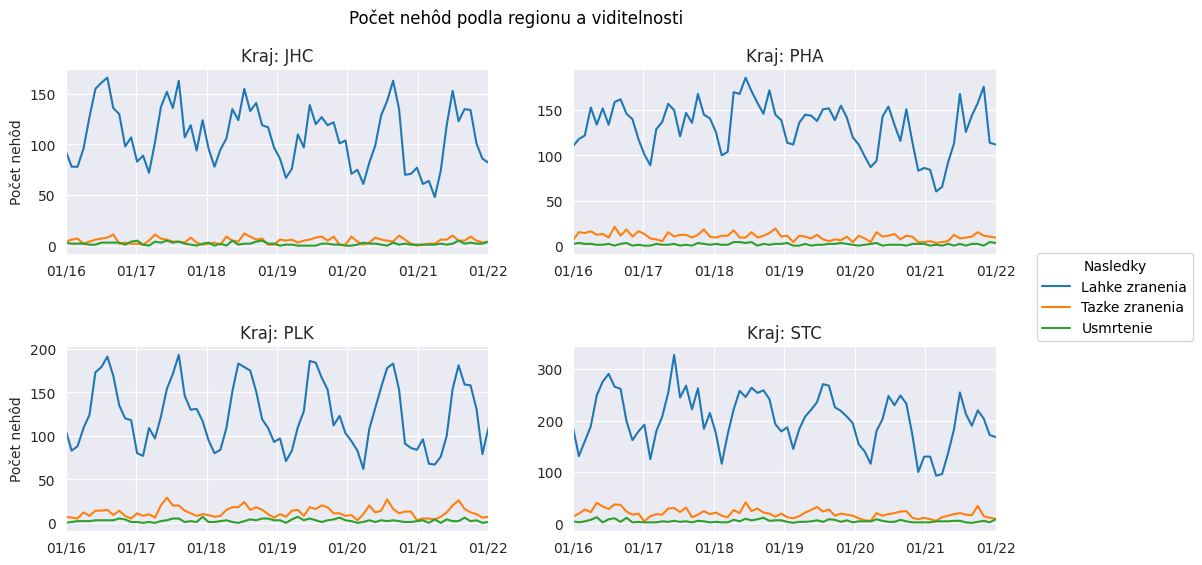

In [307]:
from matplotlib.ticker import LinearLocator
with sns.axes_style("darkgrid"):  # set style
    fig, axes = plt.subplots(2, 2, figsize=(12, 6))

fig.subplots_adjust(hspace=.5)  # bigger space between plot rows
fig.suptitle("Počet nehôd podla regionu a viditelnosti")
axx = [*axes[0], *axes[1]]  # 2d array to 1d

labels = ["01/16", "01/17", "01/18", "01/19", "01/20", "01/21", "01/22"]
locator = LinearLocator(numticks=len(labels))  # i know, not the best solution

for ii, (i, g) in enumerate(resampled.groupby("region")):
    axx[ii].margins(x=0)
    with sns.axes_style("darkgrid"):  # set style
        p = g.plot(kind="line", ax=axx[ii])

    p.get_xaxis().set_major_locator(locator)
    p.set_xticklabels(labels)
    p.set_xlabel(None)
    if ii % 2 == 0:
        p.set_ylabel("Počet nehôd")

    p.get_legend().remove()
    p.set_title(f"Kraj: {i}")

fig.legend(["Lahke zranenia", "Tazke zranenia", "Usmrtenie"], title="Nasledky", loc="center right", bbox_to_anchor=(1.07,.5))
plt.show(fig)

In [ ]:
#pivot = regions_data.pivot_table(columns=["region", "date"], values=["p13a", "p13b", "p13c"], aggfunc="sum")

In [ ]:
#pivot.unstack()

In [ ]:
#pivot.unstack()